In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
df = pd.read_csv('Processed_Train_Data')

In [4]:
df1 = df.copy()

In [5]:
#df1 = df.sort_values(by = ['Year','Month','Week'])

In [6]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,...,0.00,211.096358,8.106,2010,2,5,False,False,False,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.00,...,0.00,211.096358,8.106,2010,2,5,False,False,False,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.00,...,0.00,211.096358,8.106,2010,2,5,False,False,False,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.00,...,0.00,211.096358,8.106,2010,2,5,False,False,False,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.00,...,0.00,211.096358,8.106,2010,2,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420280,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,...,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420281,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,...,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420282,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,...,858.33,192.308899,8.667,2012,10,43,False,False,False,False
420283,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,...,858.33,192.308899,8.667,2012,10,43,False,False,False,False


In [7]:
# since we are predicting the overall sales per week sum of all departments_ across all stores
# we drop 

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [9]:
df1['Date1'] = pd.to_datetime(df1['Date'])

In [10]:
df1.set_index('Date',inplace=True)

In [11]:
df_week = df1.resample('W').mean()

In [12]:
# we will drop all other columns and include the holiday columns
# since we are predicting avg weekly sales across all the locations 
# the variables of interest are the weekly sales and its effects by whethers its a holiday or not

<AxesSubplot:xlabel='Date'>

<Figure size 1000x600 with 0 Axes>

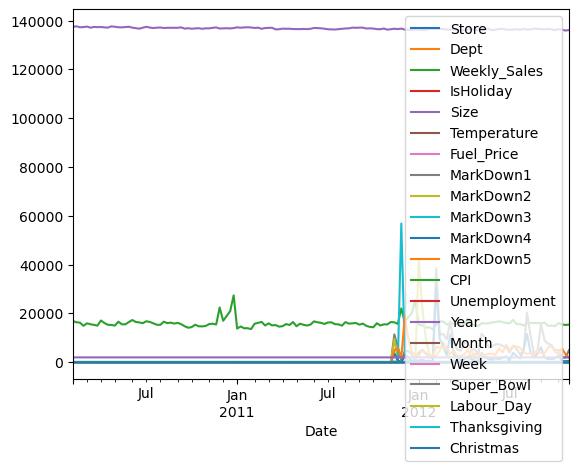

In [13]:
plt.figure(figsize=(10,6))
df_week.plot()

In [14]:
df_week

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Week,Super_Bowl,Labour_Day,Thanksgiving,Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.035957,44.144166,16876.145176,0.0,137427.979986,33.284630,2.717941,0.000000,0.000000,0.000000,...,0.000000,167.357048,8.578049,2010.0,2.0,5.0,0.0,0.0,0.0,0.0
2010-02-14,22.006443,44.331638,16390.912208,1.0,137675.080027,33.370444,2.695955,0.000000,0.000000,0.000000,...,0.000000,167.401961,8.567855,2010.0,2.0,6.0,1.0,0.0,0.0,0.0
2010-02-21,22.040390,44.288455,16249.714685,0.0,137274.186469,37.039727,2.673587,0.000000,0.000000,0.000000,...,0.000000,167.372455,8.574993,2010.0,2.0,7.0,0.0,0.0,0.0,0.0
2010-02-28,22.019028,44.082229,14940.686595,0.0,137355.873598,38.636031,2.685449,0.000000,0.000000,0.000000,...,0.000000,167.724288,8.562098,2010.0,2.0,8.0,0.0,0.0,0.0,0.0
2010-03-07,22.056199,44.019755,15964.821240,0.0,137556.273161,42.367490,2.731923,0.000000,0.000000,0.000000,...,0.000000,167.680036,8.573890,2010.0,3.0,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,22.227981,44.099932,14815.621125,0.0,136080.131775,68.163750,3.858017,4895.531619,19.071321,5.247659,...,4246.619665,175.983576,7.222354,2012.0,9.0,39.0,0.0,0.0,0.0,0.0
2012-10-07,22.257162,44.518369,16032.036903,0.0,136484.789350,65.449390,3.848439,5043.202406,0.000000,19.990903,...,3622.691921,175.992008,6.940704,2012.0,10.0,40.0,0.0,0.0,0.0,0.0
2012-10-14,22.203760,44.574018,15484.696200,0.0,136284.739846,57.678090,3.896989,1956.173911,0.000000,16.775955,...,5608.688929,176.161362,6.949037,2012.0,10.0,41.0,0.0,0.0,0.0,0.0


# will map the holidays to the date
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [15]:
df_week['Date'] = df_week.index.date.astype(str)
df_week['Date'] = df_week['Date'].astype(str)

# Remove leading/trailing spaces (if any)
df_week['Date'] = df_week['Date'].str.strip()


In [16]:
df_week['Date'] = pd.to_datetime(df_week['Date'])

In [17]:
df_week = df_week[['Weekly_Sales','Date']]

In [18]:
df_week

,Weekly_Sales,Date
Date,,
2010-02-07,16876.145176,2010-02-07
2010-02-14,16390.912208,2010-02-14
2010-02-21,16249.714685,2010-02-21
2010-02-28,14940.686595,2010-02-28
2010-03-07,15964.821240,2010-03-07
...,...,...
2012-09-30,14815.621125,2012-09-30
2012-10-07,16032.036903,2012-10-07
2012-10-14,15484.696200,2012-10-14


In [19]:
a = pd.to_datetime(['2011-02-11','2010-02-12','2012-02-10',
'2010-09-10','2012-09-07','2011-09-09',
'2010-11-26','2011-11-25',
'2010-12-31','2011-12-30'])

In [20]:
df_week.tail()

,Weekly_Sales,Date
Date,,
2012-09-30,14815.621125,2012-09-30
2012-10-07,16032.036903,2012-10-07
2012-10-14,15484.696200,2012-10-14
2012-10-21,15311.314544,2012-10-21
2012-10-28,15433.541013,2012-10-28


In [21]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-07 to 2012-10-28
Freq: W-SUN
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Weekly_Sales  143 non-null    float64       
 1   Date          143 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [22]:
target_superbowl = pd.to_datetime(['2011-02-11', '2010-02-12', '2012-02-10'])
target_labour = pd.to_datetime(['2010-09-10', '2012-09-07', '2011-09-09'])
target_thanksgiving = pd.to_datetime(['2010-11-26', '2011-11-25'])
target_christmas = pd.to_datetime(['2010-12-31', '2011-12-30'])

# Create columns for each event and map whether the week contains the holiday
df_week['Super_Bowl'] = df_week['Date'].apply(lambda x: 'Yes' if x.week in target_superbowl.week else 'False')
df_week['Labour_Day'] = df_week['Date'].apply(lambda x: 'Yes' if x.week in target_labour.week else 'False')
df_week['Thanksgiving'] = df_week['Date'].apply(lambda x: 'Yes' if x.week in target_thanksgiving.week else 'False')
df_week['Christmas'] = df_week['Date'].apply(lambda x: 'Yes' if x.week in target_christmas.week else 'False')

# Display the DataFrame


In [23]:
df_week['Christmas'].value_counts()

False    141
Yes        2
Name: Christmas, dtype: int64

In [24]:
df_week.Super_Bowl.value_counts()


False    140
Yes        3
Name: Super_Bowl, dtype: int64

In [25]:
a.week

Int64Index([6, 6, 6, 36, 36, 36, 47, 47, 52, 52], dtype='int64')

In [26]:
df_week['Holiday'] = df_week['Date'].apply(lambda x: 'Yes' if x.week in a.week else 'False')


In [27]:
df_week

,Weekly_Sales,Date,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday
Date,,,,,,,
2010-02-07,16876.145176,2010-02-07,False,False,False,False,False
2010-02-14,16390.912208,2010-02-14,Yes,False,False,False,Yes
2010-02-21,16249.714685,2010-02-21,False,False,False,False,False
2010-02-28,14940.686595,2010-02-28,False,False,False,False,False
2010-03-07,15964.821240,2010-03-07,False,False,False,False,False
...,...,...,...,...,...,...,...
2012-09-30,14815.621125,2012-09-30,False,False,False,False,False
2012-10-07,16032.036903,2012-10-07,False,False,False,False,False
2012-10-14,15484.696200,2012-10-14,False,False,False,False,False


In [28]:
df_week.drop(columns=['Date'],inplace=True)

In [29]:
df_week

,Weekly_Sales,Super_Bowl,Labour_Day,Thanksgiving,Christmas,Holiday
Date,,,,,,
2010-02-07,16876.145176,False,False,False,False,False
2010-02-14,16390.912208,Yes,False,False,False,Yes
2010-02-21,16249.714685,False,False,False,False,False
2010-02-28,14940.686595,False,False,False,False,False
2010-03-07,15964.821240,False,False,False,False,False
...,...,...,...,...,...,...
2012-09-30,14815.621125,False,False,False,False,False
2012-10-07,16032.036903,False,False,False,False,False
2012-10-14,15484.696200,False,False,False,False,False


In [30]:
df_week['Holiday'] = df_week['Holiday'].map({'False':0,'Yes':1})

In [31]:
df_week = pd.get_dummies(df_week,drop_first=True)

<AxesSubplot:xlabel='Date'>

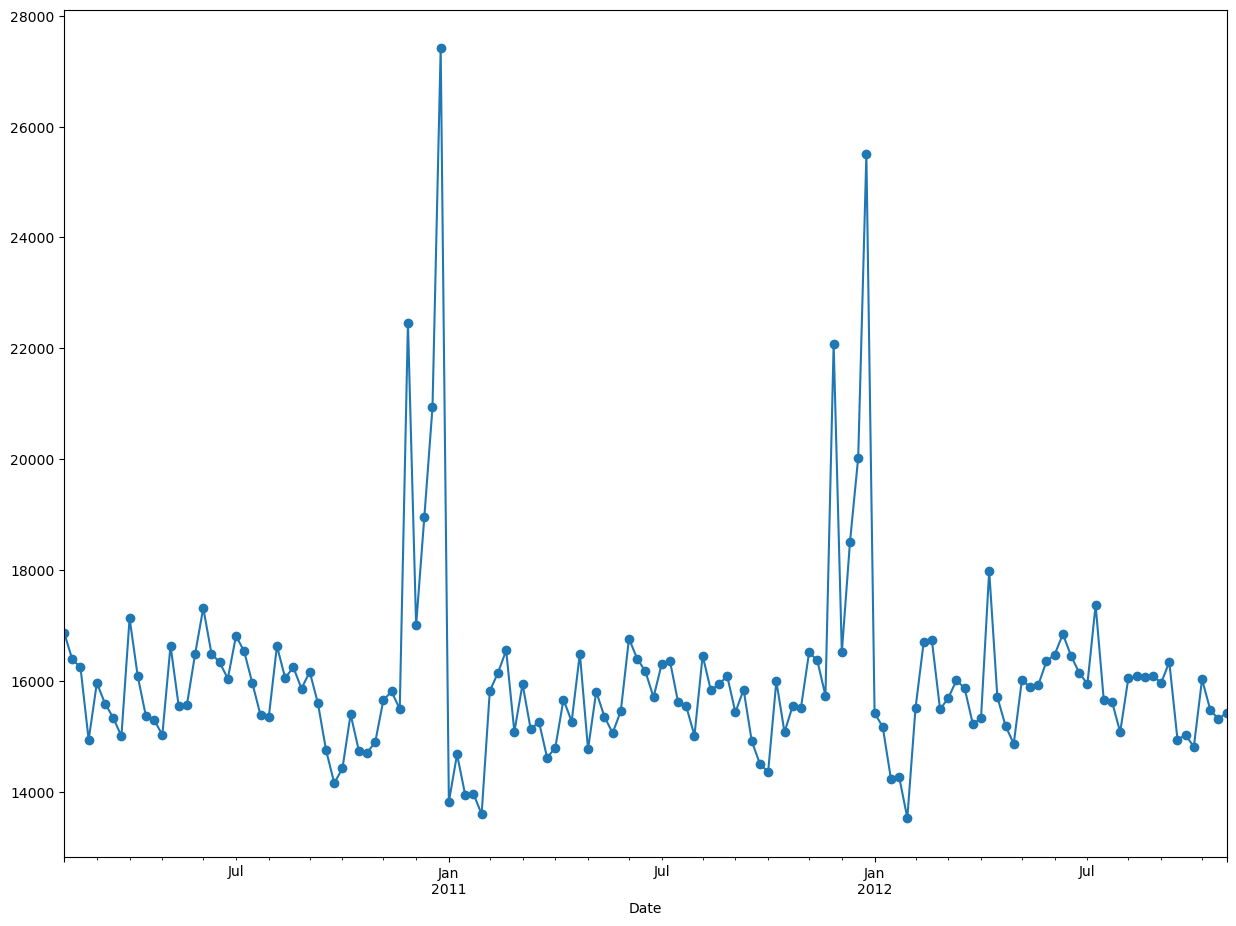

In [32]:
plt.figure(figsize=(15,11))

df_week['Weekly_Sales'].plot(marker = 'o')

<AxesSubplot:ylabel='Weekly_Sales'>

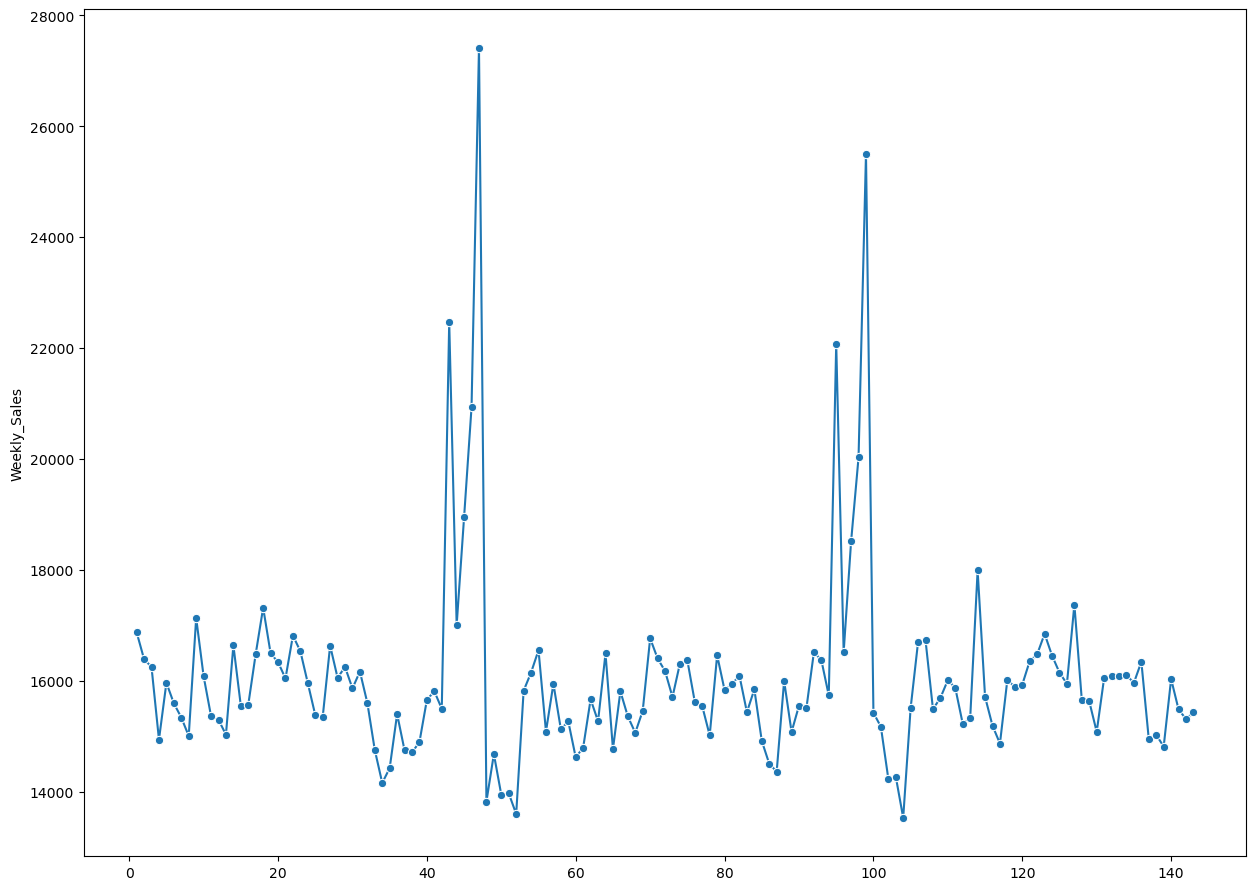

In [33]:
plt.figure(figsize=(15,11))

sns.lineplot(np.arange(1,144),df_week['Weekly_Sales'],marker = 'o')


In [34]:
len(df_week)

143

In [35]:
# at every 52 weeks the pattern repeats 
# also  at every 33 weeks there is seasonal pattern

In [36]:
df_week

,Weekly_Sales,Holiday,Super_Bowl_Yes,Labour_Day_Yes,Thanksgiving_Yes,Christmas_Yes
Date,,,,,,
2010-02-07,16876.145176,0,0,0,0,0
2010-02-14,16390.912208,1,1,0,0,0
2010-02-21,16249.714685,0,0,0,0,0
2010-02-28,14940.686595,0,0,0,0,0
2010-03-07,15964.821240,0,0,0,0,0
...,...,...,...,...,...,...
2012-09-30,14815.621125,0,0,0,0,0
2012-10-07,16032.036903,0,0,0,0,0
2012-10-14,15484.696200,0,0,0,0,0


In [37]:
# we can see that pattern repeats ate 

In [38]:
# at every 20 pattern repeats

<Figure size 1500x1000 with 0 Axes>

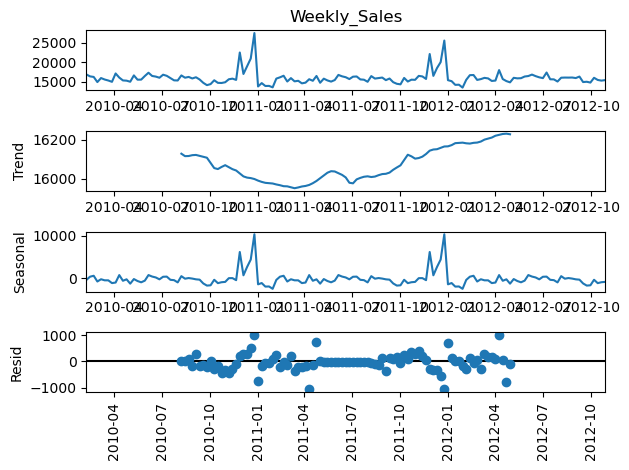

In [39]:
##  we will decompose the timeseries to get more insight about the data
plt.figure(figsize=(15,10))
seasonal_decompose(df_week['Weekly_Sales'],model='additive',period=52).plot();
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

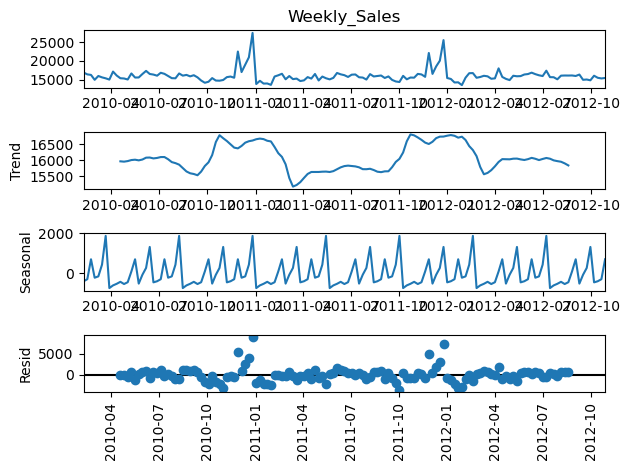

In [40]:
##  we will decompose the timeseries to get more insight about the data
plt.figure(figsize=(15,10))
seasonal_decompose(df_week['Weekly_Sales'],model='additive',period=20).plot();
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

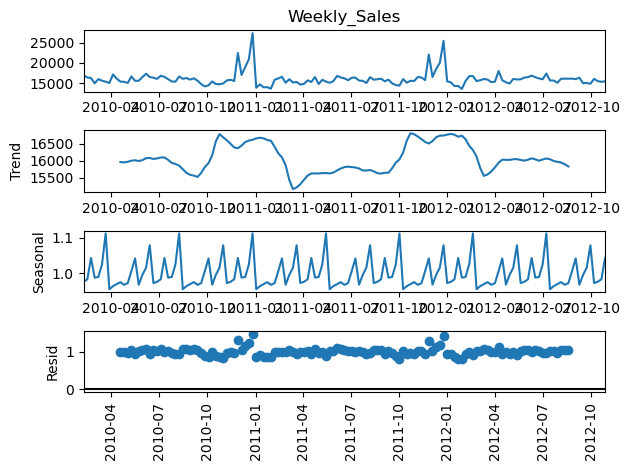

In [41]:
plt.figure(figsize=(15,10))
seasonal_decompose(df_week['Weekly_Sales'],model='multiplicative',period=20).plot();
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

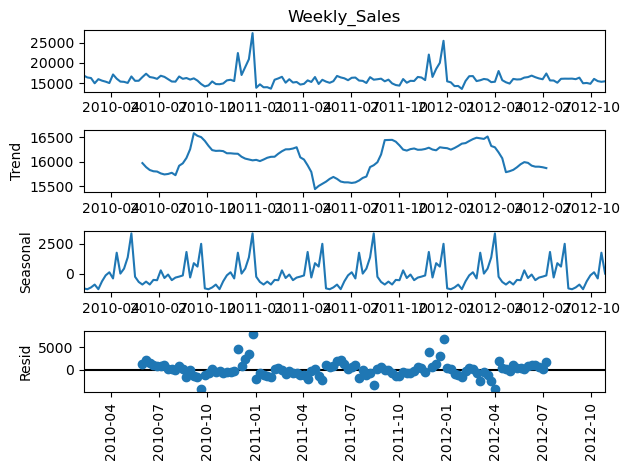

In [42]:
##  we will decompose the timeseries to get more insight about the data
plt.figure(figsize=(15,10))
seasonal_decompose(df_week['Weekly_Sales'],model='additive',period=33).plot();
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
pd.set_option('display.max_rows', None)


In [44]:
#
import statsmodels.api as sm
result = sm.tsa.adfuller(df_week['Weekly_Sales'])

# Extract and print the ADF test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series may not be stationary.")

ADF Statistic: -5.927437652782708
p-value: 2.424917229727438e-07
Critical Values:
   1%: -3.47864788917503
   5%: -2.882721765644168
   10%: -2.578065326612056
Reject the null hypothesis. The time series is likely stationary.


In [45]:
#Exponential Smoothing
# we will try the period of seasonality with both 33 and 52 , 20

In [46]:
def WMAE(ytest,ypred):
    weight =  test['Holiday'].apply(lambda x : 5 if x else 1)
    error = (np.sum(weight*np.abs(ytest-ypred)))/(np.sum(weight))
    return error

In [47]:
def wmae_test(test, pred): # WMAE for test 
    weights = test['Holiday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [48]:
round(len(df_week)*.75)

107

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 1200x400 with 0 Axes>

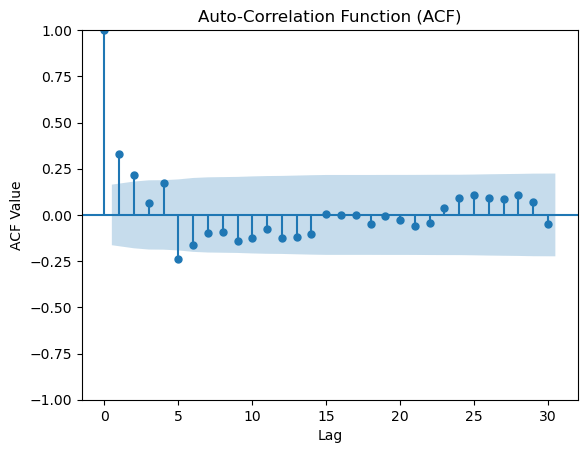

<Figure size 1200x400 with 0 Axes>

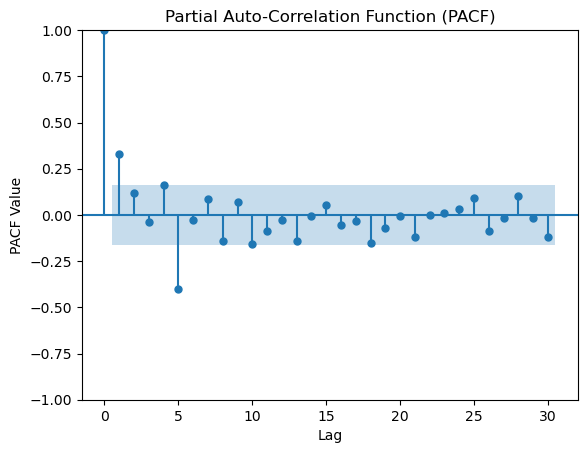

In [50]:
plt.figure(figsize=(12, 4))
plot_acf(df_week['Weekly_Sales'], lags=30)  # Adjust 'lags' as needed
plt.title('Auto-Correlation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

# Plot the PACF (Partial Auto-Correlation Function)
plt.figure(figsize=(12, 4))
plot_pacf(df_week['Weekly_Sales'], lags=30)  # Adjust 'lags' as needed
plt.title('Partial Auto-Correlation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()




In [51]:
train = df_week[:round(len(df_week)*.75)]
test = df_week[round(len(df_week)*.75):]

In [52]:
e1_20 = ExponentialSmoothing(train['Weekly_Sales'],seasonal_periods=20,seasonal='additive',trend ='additive').fit()
e1_33 = ExponentialSmoothing(train['Weekly_Sales'],seasonal_periods=33,seasonal='additive',trend ='additive').fit()
e1_52 = ExponentialSmoothing(train['Weekly_Sales'],seasonal_periods=52,seasonal='additive',trend ='additive').fit()


In [53]:
e1_20.params

{'smoothing_level': 0.42928571428571427,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 15936.256185590493,
 'initial_trend': 13.91812179293288,
 'initial_seasons': array([-188.70390353,  169.70574667, 1562.7524165 ,  459.56033798,
         104.51122831,  701.35284483, 2475.74716615, -761.19317845,
        -703.1420818 , -588.80132626, -428.93848887, -728.51811503,
        -562.18992232,  -76.27618105, -166.02448185, -458.23296241,
        -183.66002113, -321.36352648,  -76.80782736, -229.77772389]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [54]:
perf_score = pd.DataFrame(columns=["Model",'WMAE' ] )


def update_performance (name,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'WMAE'         : WMAE(test,pred)

                                     },
                                   ignore_index = True)

In [55]:
y_pred_20 = e1_20.forecast(len(test))
y_pred_33 = e1_33.forecast(len(test))
y_pred_52 = e1_52.forecast(len(test))


In [56]:
WMAE(test['Weekly_Sales'],y_pred_20)
update_performance('Exp_20',test['Weekly_Sales'],y_pred_20)

In [57]:
WMAE(test['Weekly_Sales'],y_pred_33)
update_performance('Exp_33',test['Weekly_Sales'],y_pred_33)

In [58]:
WMAE(test['Weekly_Sales'],y_pred_52)
update_performance('Exp_52',test['Weekly_Sales'],y_pred_52)

In [59]:
perf_score

,Model,WMAE
0,Exp_20,1080.462826
1,Exp_33,1168.223866
2,Exp_52,533.879699


In [60]:
## we have got the minimum error for the 52 week seasonal component 

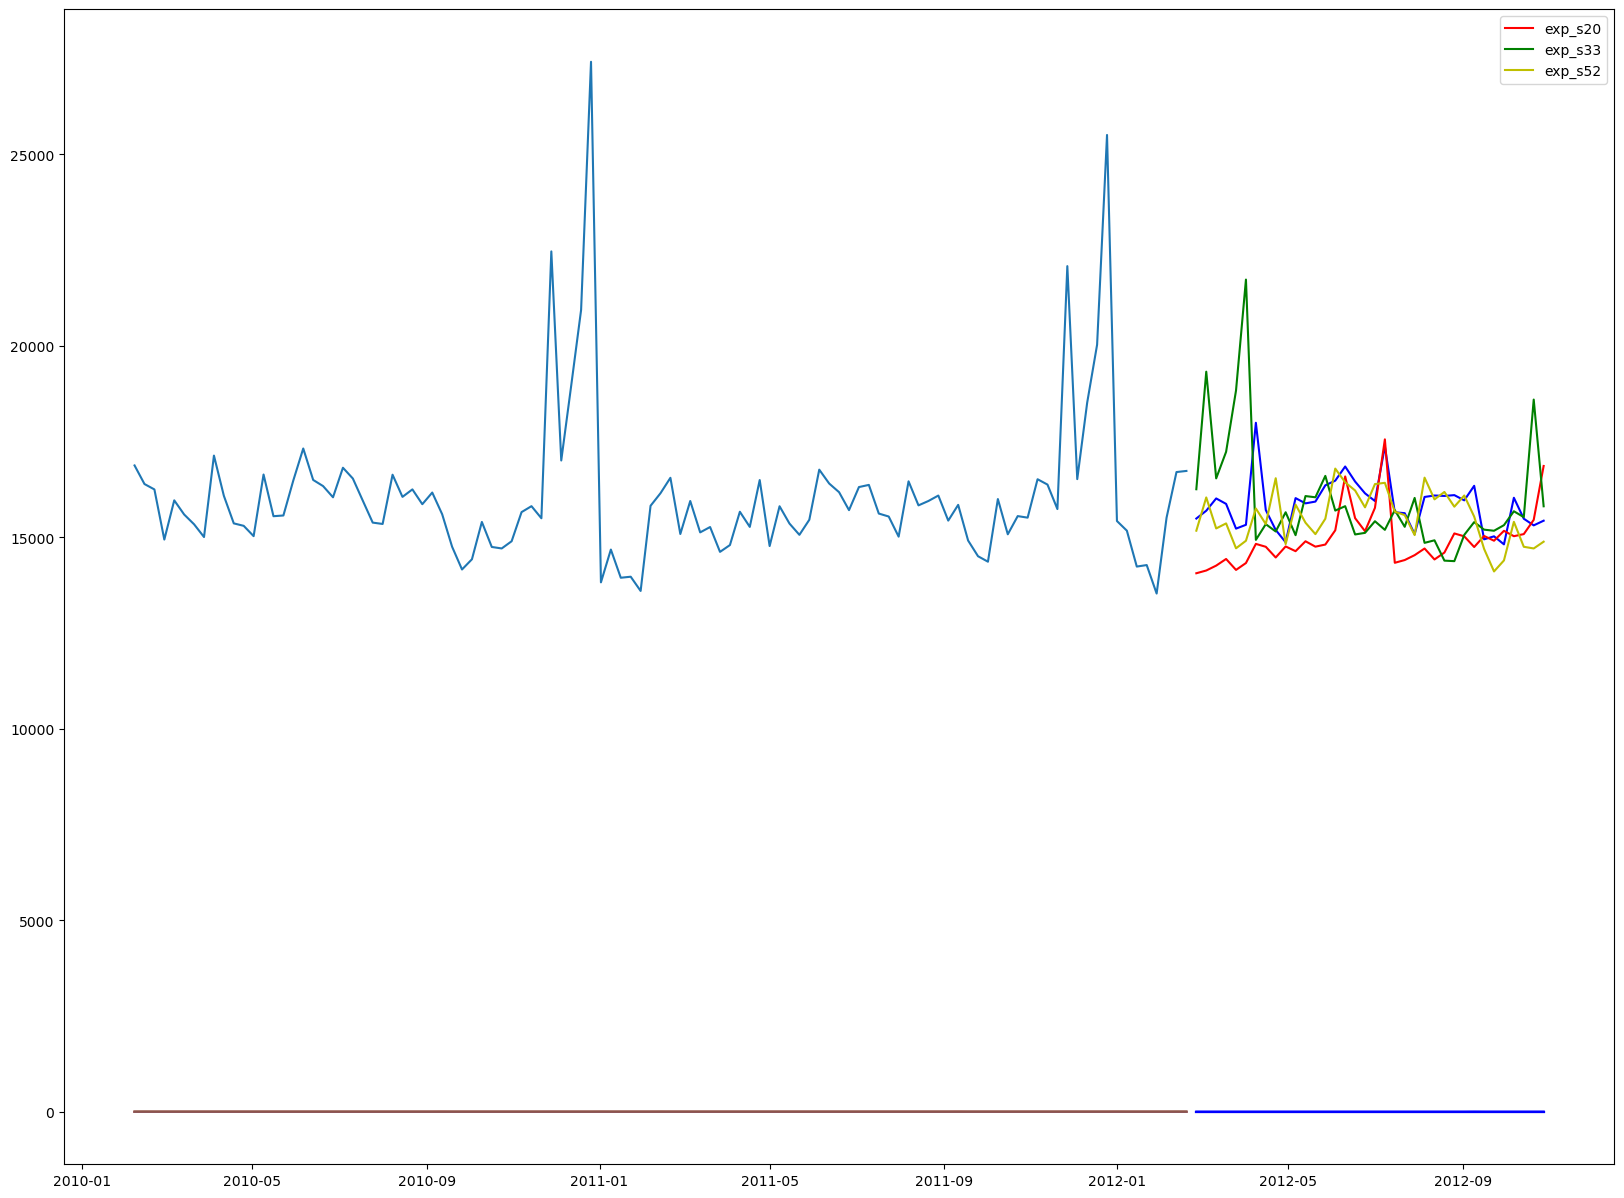

In [61]:
plt.figure(figsize=(20,15))
plt.plot(train)
plt.plot(test,color ='b');
plt.plot(y_pred_20,color = 'r',label = 'exp_s20')
plt.plot(y_pred_33,color = 'g',label = 'exp_s33')
plt.plot(y_pred_52,color = 'y',label = 'exp_s52')
plt.legend()
plt.show()

In [62]:
#

<Figure size 1200x400 with 0 Axes>

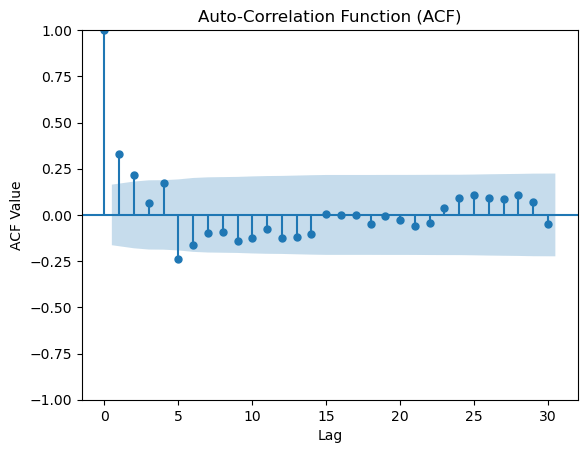

<Figure size 1200x400 with 0 Axes>

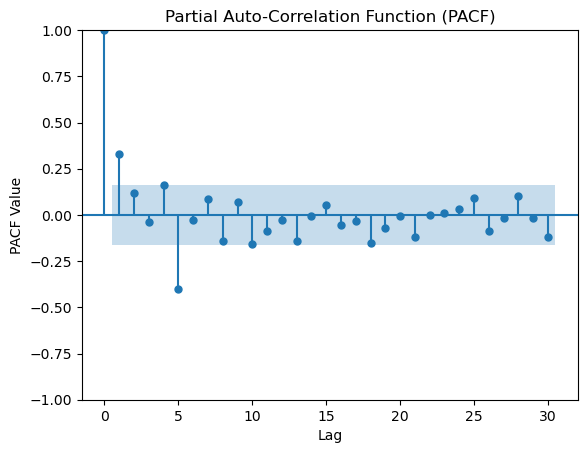

In [63]:
## Arima
plt.figure(figsize=(12, 4))
plot_acf(df_week['Weekly_Sales'], lags=30)  # Adjust 'lags' as needed
plt.title('Auto-Correlation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

# Plot the PACF (Partial Auto-Correlation Function)
plt.figure(figsize=(12, 4))
plot_pacf(df_week['Weekly_Sales'], lags=30)  # Adjust 'lags' as needed
plt.title('Partial Auto-Correlation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()


In [64]:
# both ma and ar components are only upto 5 lags

In [65]:
from pmdarima import auto_arima


In [66]:
exog = train.drop(columns = ['Weekly_Sales'])

In [67]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Building Arima , Sarima and Sarimax models

In [68]:
p = q = range(0, 6)

d= range(0,1)

pdq = list(itertools.product(p, d, q))

In [66]:
## normal arima
p = q = range(0, 6)

d= range(0,1)

pdq = list(itertools.product(p, d, q))
for i in pdq:
    arima_model = ARIMA(train['Weekly_Sales'],order = i).fit()
    print(i,arima_model.aic)

(0, 0, 0) 1936.3367191971674
(0, 0, 1) 1929.3708859334477
(0, 0, 2) 1927.0057353111279
(0, 0, 3) 1927.518913063295
(0, 0, 4) 1910.8211834908022
(0, 0, 5) 1910.1604518083375
(1, 0, 0) 1925.9026796816224
(1, 0, 1) 1926.6293251993236
(1, 0, 2) 1917.7741580603374
(1, 0, 3) 1917.497549752505
(1, 0, 4) 1911.7767504964345
(1, 0, 5) 1905.7348505499492
(2, 0, 0) 1926.2120234436984
(2, 0, 1) 1924.4616699132405
(2, 0, 2) 1913.535139863633
(2, 0, 3) 1917.6831898594744
(2, 0, 4) 1908.602832283843
(2, 0, 5) 1907.5713690170057
(3, 0, 0) 1928.0556747056671
(3, 0, 1) 1925.9018776643566
(3, 0, 2) 1922.0046837398675
(3, 0, 3) 1918.3842067226408
(3, 0, 4) 1913.0050092396673
(3, 0, 5) 1909.4988749691463
(4, 0, 0) 1927.8590772862963
(4, 0, 1) 1924.2962620130802
(4, 0, 2) 1912.9405550544407
(4, 0, 3) 1917.889199161544
(4, 0, 4) 1913.8307626423184
(4, 0, 5) 1911.0260818064849
(5, 0, 0) 1911.773938093598
(5, 0, 1) 1913.778792214245
(5, 0, 2) 1915.531134945129
(5, 0, 3) 1911.449465286292
(5, 0, 4) 1913.68766219

In [71]:
# so the best arima model is the one with (1, 0, 5) params and AIC = 1905.7348505499492
model_Arima  =ARIMA(train['Weekly_Sales'],order =(1, 0, 5),enforce_stationarity=False,enforce_invertibility= False ).fit()

In [72]:
y_arima  = model_Arima.forecast(len(test))

In [73]:
WMAE(test['Weekly_Sales'],y_arima)

492.37192259971937

In [74]:
update_performance('Arima',test['Weekly_Sales'],y_arima)

In [75]:
perf_score

,Model,WMAE
0,Exp_20,1080.462826
1,Exp_33,1168.223866
2,Exp_52,533.879699
3,Arima,492.371923


In [336]:
SARIMAX_AIC = pd.DataFrame(columns = ['param','seasonal','AIC'])
import itertools

p = q = range(0, 6)

d= range(0,1)

pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]



for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Weekly_Sales'],exog=exog,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        SARIMAX_AIC = SARIMAX_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)

SARIMA(0, 0, 0)(0, 0, 0, 52) - AIC:2747.2987613396676
SARIMA(0, 0, 0)(0, 0, 1, 52) - AIC:1000.4842435379207
SARIMA(0, 0, 0)(0, 0, 2, 52) - AIC:53.59436497767682
SARIMA(0, 0, 0)(0, 0, 3, 52) - AIC:18.0
SARIMA(0, 0, 0)(0, 0, 4, 52) - AIC:20.0
SARIMA(0, 0, 0)(0, 0, 5, 52) - AIC:22.0
SARIMA(0, 0, 0)(1, 0, 0, 52) - AIC:879.0231361379188
SARIMA(0, 0, 0)(1, 0, 1, 52) - AIC:864.4006686489239
SARIMA(0, 0, 0)(1, 0, 2, 52) - AIC:55.552557377443335
SARIMA(0, 0, 0)(1, 0, 3, 52) - AIC:20.0
SARIMA(0, 0, 0)(1, 0, 4, 52) - AIC:22.0
SARIMA(0, 0, 0)(1, 0, 5, 52) - AIC:24.0
SARIMA(0, 0, 0)(2, 0, 0, 52) - AIC:59.8029829099915
SARIMA(0, 0, 0)(2, 0, 1, 52) - AIC:74.35382534932468
SARIMA(0, 0, 0)(2, 0, 2, 52) - AIC:57.53934250477711
SARIMA(0, 0, 0)(2, 0, 3, 52) - AIC:22.0
SARIMA(0, 0, 0)(2, 0, 4, 52) - AIC:24.0
SARIMA(0, 0, 0)(2, 0, 5, 52) - AIC:26.0
SARIMA(0, 0, 0)(3, 0, 0, 52) - AIC:18.0
SARIMA(0, 0, 0)(3, 0, 1, 52) - AIC:20.0
SARIMA(0, 0, 0)(3, 0, 2, 52) - AIC:22.0
SARIMA(0, 0, 0)(3, 0, 3, 52) - AIC:24.0
S

SARIMA(0, 0, 5)(2, 0, 0, 52) - AIC:89.32836430308906
SARIMA(0, 0, 5)(2, 0, 1, 52) - AIC:91.32829611356436
SARIMA(0, 0, 5)(2, 0, 2, 52) - AIC:30.0
SARIMA(0, 0, 5)(2, 0, 3, 52) - AIC:32.0
SARIMA(0, 0, 5)(2, 0, 4, 52) - AIC:34.0
SARIMA(0, 0, 5)(2, 0, 5, 52) - AIC:36.0
SARIMA(0, 0, 5)(3, 0, 0, 52) - AIC:28.0
SARIMA(0, 0, 5)(3, 0, 1, 52) - AIC:30.0
SARIMA(0, 0, 5)(3, 0, 2, 52) - AIC:32.0
SARIMA(0, 0, 5)(3, 0, 3, 52) - AIC:34.0
SARIMA(0, 0, 5)(3, 0, 4, 52) - AIC:36.0
SARIMA(0, 0, 5)(3, 0, 5, 52) - AIC:38.0
SARIMA(0, 0, 5)(4, 0, 0, 52) - AIC:30.0
SARIMA(0, 0, 5)(4, 0, 1, 52) - AIC:32.0
SARIMA(0, 0, 5)(4, 0, 2, 52) - AIC:34.0
SARIMA(0, 0, 5)(4, 0, 3, 52) - AIC:36.0
SARIMA(0, 0, 5)(4, 0, 4, 52) - AIC:38.0
SARIMA(0, 0, 5)(4, 0, 5, 52) - AIC:40.0
SARIMA(0, 0, 5)(5, 0, 0, 52) - AIC:32.0
SARIMA(0, 0, 5)(5, 0, 1, 52) - AIC:34.0
SARIMA(0, 0, 5)(5, 0, 2, 52) - AIC:36.0
SARIMA(0, 0, 5)(5, 0, 3, 52) - AIC:38.0
SARIMA(0, 0, 5)(5, 0, 4, 52) - AIC:40.0
SARIMA(0, 0, 5)(5, 0, 5, 52) - AIC:42.0
SARIMA(1, 0, 0

SARIMA(1, 0, 4)(4, 0, 1, 52) - AIC:32.0
SARIMA(1, 0, 4)(4, 0, 2, 52) - AIC:34.0
SARIMA(1, 0, 4)(4, 0, 3, 52) - AIC:36.0
SARIMA(1, 0, 4)(4, 0, 4, 52) - AIC:38.0
SARIMA(1, 0, 4)(4, 0, 5, 52) - AIC:40.0
SARIMA(1, 0, 4)(5, 0, 0, 52) - AIC:32.0
SARIMA(1, 0, 4)(5, 0, 1, 52) - AIC:34.0
SARIMA(1, 0, 4)(5, 0, 2, 52) - AIC:36.0
SARIMA(1, 0, 4)(5, 0, 3, 52) - AIC:38.0
SARIMA(1, 0, 4)(5, 0, 4, 52) - AIC:40.0
SARIMA(1, 0, 4)(5, 0, 5, 52) - AIC:42.0
SARIMA(1, 0, 5)(0, 0, 0, 52) - AIC:2018.2819139121345
SARIMA(1, 0, 5)(0, 0, 1, 52) - AIC:966.5374905657969
SARIMA(1, 0, 5)(0, 0, 2, 52) - AIC:28.0
SARIMA(1, 0, 5)(0, 0, 3, 52) - AIC:30.0
SARIMA(1, 0, 5)(0, 0, 4, 52) - AIC:32.0
SARIMA(1, 0, 5)(0, 0, 5, 52) - AIC:34.0
SARIMA(1, 0, 5)(1, 0, 0, 52) - AIC:911.0908807044309
SARIMA(1, 0, 5)(1, 0, 1, 52) - AIC:960.8666472302247
SARIMA(1, 0, 5)(1, 0, 2, 52) - AIC:30.0
SARIMA(1, 0, 5)(1, 0, 3, 52) - AIC:32.0
SARIMA(1, 0, 5)(1, 0, 4, 52) - AIC:34.0
SARIMA(1, 0, 5)(1, 0, 5, 52) - AIC:36.0
SARIMA(1, 0, 5)(2, 0, 0, 52

SARIMA(2, 0, 4)(0, 0, 2, 52) - AIC:28.0
SARIMA(2, 0, 4)(0, 0, 3, 52) - AIC:30.0
SARIMA(2, 0, 4)(0, 0, 4, 52) - AIC:32.0
SARIMA(2, 0, 4)(0, 0, 5, 52) - AIC:34.0
SARIMA(2, 0, 4)(1, 0, 0, 52) - AIC:1034.443324489815
SARIMA(2, 0, 4)(1, 0, 1, 52) - AIC:979.1431402007739
SARIMA(2, 0, 4)(1, 0, 2, 52) - AIC:30.0
SARIMA(2, 0, 4)(1, 0, 3, 52) - AIC:32.0
SARIMA(2, 0, 4)(1, 0, 4, 52) - AIC:34.0
SARIMA(2, 0, 4)(1, 0, 5, 52) - AIC:36.0
SARIMA(2, 0, 4)(2, 0, 0, 52) - AIC:47.01528067934953
SARIMA(2, 0, 4)(2, 0, 1, 52) - AIC:49.01528834554955
SARIMA(2, 0, 4)(2, 0, 2, 52) - AIC:32.0
SARIMA(2, 0, 4)(2, 0, 3, 52) - AIC:34.0
SARIMA(2, 0, 4)(2, 0, 4, 52) - AIC:36.0
SARIMA(2, 0, 4)(2, 0, 5, 52) - AIC:38.0
SARIMA(2, 0, 4)(3, 0, 0, 52) - AIC:30.0
SARIMA(2, 0, 4)(3, 0, 1, 52) - AIC:32.0
SARIMA(2, 0, 4)(3, 0, 2, 52) - AIC:34.0
SARIMA(2, 0, 4)(3, 0, 3, 52) - AIC:36.0
SARIMA(2, 0, 4)(3, 0, 4, 52) - AIC:38.0
SARIMA(2, 0, 4)(3, 0, 5, 52) - AIC:40.0
SARIMA(2, 0, 4)(4, 0, 0, 52) - AIC:32.0
SARIMA(2, 0, 4)(4, 0, 1, 52)

SARIMA(3, 0, 3)(2, 0, 5, 52) - AIC:38.0
SARIMA(3, 0, 3)(3, 0, 0, 52) - AIC:30.0
SARIMA(3, 0, 3)(3, 0, 1, 52) - AIC:32.0
SARIMA(3, 0, 3)(3, 0, 2, 52) - AIC:34.0
SARIMA(3, 0, 3)(3, 0, 3, 52) - AIC:36.0
SARIMA(3, 0, 3)(3, 0, 4, 52) - AIC:38.0
SARIMA(3, 0, 3)(3, 0, 5, 52) - AIC:40.0
SARIMA(3, 0, 3)(4, 0, 0, 52) - AIC:32.0
SARIMA(3, 0, 3)(4, 0, 1, 52) - AIC:34.0
SARIMA(3, 0, 3)(4, 0, 2, 52) - AIC:36.0
SARIMA(3, 0, 3)(4, 0, 3, 52) - AIC:38.0
SARIMA(3, 0, 3)(4, 0, 4, 52) - AIC:40.0
SARIMA(3, 0, 3)(4, 0, 5, 52) - AIC:42.0
SARIMA(3, 0, 3)(5, 0, 0, 52) - AIC:34.0
SARIMA(3, 0, 3)(5, 0, 1, 52) - AIC:36.0
SARIMA(3, 0, 3)(5, 0, 2, 52) - AIC:38.0
SARIMA(3, 0, 3)(5, 0, 3, 52) - AIC:40.0
SARIMA(3, 0, 3)(5, 0, 4, 52) - AIC:42.0
SARIMA(3, 0, 3)(5, 0, 5, 52) - AIC:44.0
SARIMA(3, 0, 4)(0, 0, 0, 52) - AIC:2037.1778660292437
SARIMA(3, 0, 4)(0, 0, 1, 52) - AIC:974.6170345644465
SARIMA(3, 0, 4)(0, 0, 2, 52) - AIC:30.0
SARIMA(3, 0, 4)(0, 0, 3, 52) - AIC:32.0
SARIMA(3, 0, 4)(0, 0, 4, 52) - AIC:34.0
SARIMA(3, 0, 

SARIMA(4, 0, 2)(5, 0, 4, 52) - AIC:42.0
SARIMA(4, 0, 2)(5, 0, 5, 52) - AIC:44.0
SARIMA(4, 0, 3)(0, 0, 0, 52) - AIC:2055.5944285177247
SARIMA(4, 0, 3)(0, 0, 1, 52) - AIC:991.0567180068911
SARIMA(4, 0, 3)(0, 0, 2, 52) - AIC:30.0
SARIMA(4, 0, 3)(0, 0, 3, 52) - AIC:32.0
SARIMA(4, 0, 3)(0, 0, 4, 52) - AIC:34.0
SARIMA(4, 0, 3)(0, 0, 5, 52) - AIC:36.0
SARIMA(4, 0, 3)(1, 0, 0, 52) - AIC:988.699534644619
SARIMA(4, 0, 3)(1, 0, 1, 52) - AIC:990.7038954749713
SARIMA(4, 0, 3)(1, 0, 2, 52) - AIC:32.0
SARIMA(4, 0, 3)(1, 0, 3, 52) - AIC:34.0
SARIMA(4, 0, 3)(1, 0, 4, 52) - AIC:36.0
SARIMA(4, 0, 3)(1, 0, 5, 52) - AIC:38.0
SARIMA(4, 0, 3)(2, 0, 0, 52) - AIC:30.0
SARIMA(4, 0, 3)(2, 0, 1, 52) - AIC:32.0
SARIMA(4, 0, 3)(2, 0, 2, 52) - AIC:34.0
SARIMA(4, 0, 3)(2, 0, 3, 52) - AIC:36.0
SARIMA(4, 0, 3)(2, 0, 4, 52) - AIC:38.0
SARIMA(4, 0, 3)(2, 0, 5, 52) - AIC:40.0
SARIMA(4, 0, 3)(3, 0, 0, 52) - AIC:32.0
SARIMA(4, 0, 3)(3, 0, 1, 52) - AIC:34.0
SARIMA(4, 0, 3)(3, 0, 2, 52) - AIC:36.0
SARIMA(4, 0, 3)(3, 0, 3, 52)

SARIMA(5, 0, 2)(2, 0, 2, 52) - AIC:34.0
SARIMA(5, 0, 2)(2, 0, 3, 52) - AIC:36.0
SARIMA(5, 0, 2)(2, 0, 4, 52) - AIC:38.0
SARIMA(5, 0, 2)(2, 0, 5, 52) - AIC:40.0
SARIMA(5, 0, 2)(3, 0, 0, 52) - AIC:32.0
SARIMA(5, 0, 2)(3, 0, 1, 52) - AIC:34.0
SARIMA(5, 0, 2)(3, 0, 2, 52) - AIC:36.0
SARIMA(5, 0, 2)(3, 0, 3, 52) - AIC:38.0
SARIMA(5, 0, 2)(3, 0, 4, 52) - AIC:40.0
SARIMA(5, 0, 2)(3, 0, 5, 52) - AIC:42.0
SARIMA(5, 0, 2)(4, 0, 0, 52) - AIC:34.0
SARIMA(5, 0, 2)(4, 0, 1, 52) - AIC:36.0
SARIMA(5, 0, 2)(4, 0, 2, 52) - AIC:38.0
SARIMA(5, 0, 2)(4, 0, 3, 52) - AIC:40.0
SARIMA(5, 0, 2)(4, 0, 4, 52) - AIC:42.0
SARIMA(5, 0, 2)(4, 0, 5, 52) - AIC:44.0
SARIMA(5, 0, 2)(5, 0, 0, 52) - AIC:36.0
SARIMA(5, 0, 2)(5, 0, 1, 52) - AIC:38.0
SARIMA(5, 0, 2)(5, 0, 2, 52) - AIC:40.0
SARIMA(5, 0, 2)(5, 0, 3, 52) - AIC:42.0
SARIMA(5, 0, 2)(5, 0, 4, 52) - AIC:44.0
SARIMA(5, 0, 2)(5, 0, 5, 52) - AIC:46.0
SARIMA(5, 0, 3)(0, 0, 0, 52) - AIC:2037.927175742513
SARIMA(5, 0, 3)(0, 0, 1, 52) - AIC:989.3487964354603
SARIMA(5, 0, 3

In [81]:
sarima_aic = pd.read_csv('Sarima_selection',sep ='-',names=['param','aic'])

In [82]:
sarima_aic.shape

(1296, 2)

In [83]:
#due to computational restriction i went directly for sarimax parameters
# we will use the same parameters for sarima an sarimax

In [92]:
sarima_aic['AIC'] = (sarima_aic['aic'].str.split(':').str.get(1))

In [95]:
sarima_aic.drop(columns='aic',inplace=True)

In [98]:
sarima_aic['AIC'] = sarima_aic['AIC'].astype(float)

In [160]:
sarima_aic.sort_values(by ='AIC').iloc[:5]

,param,AIC
3,"SARIMA(0, 0, 0)(0, 0, 3, 52)",18.0
18,"SARIMA(0, 0, 0)(3, 0, 0, 52)",18.0
19,"SARIMA(0, 0, 0)(3, 0, 1, 52)",20.0
219,"SARIMA(1, 0, 0)(0, 0, 3, 52)",20.0
74,"SARIMA(0, 0, 2)(0, 0, 2, 52)",20.0


In [ ]:
# we will try with both the parameters 

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [107]:
# without exogs
sarima_  = SARIMAX(train['Weekly_Sales'],order=(0, 0, 0),seasonal_order=(0, 0, 3, 52),nforce_stationarity=False,
                                            enforce_invertibility=False,).fit()

In [109]:
y_sarima_1 = sarima_.forecast(len(test))

In [110]:
WMAE(test['Weekly_Sales'],y_sarima_1)

5928.148455895016

In [111]:
update_performance('SARIMA(0, 0, 0)(0, 0, 3, 52)',test['Weekly_Sales'],y_sarima_1)

In [112]:
sarima_2  = SARIMAX(train['Weekly_Sales'],order=(0, 0, 0),seasonal_order=(3, 0, 0, 52),nforce_stationarity=False,
                                            enforce_invertibility=False,).fit()

In [113]:
y_sarima_2 = sarima_2.forecast(len(test))

In [114]:
WMAE(test['Weekly_Sales'],y_sarima_2)

445.2051528355767

In [115]:
update_performance('SARIMA(0, 0, 0)(3, 0, 0, 52)',test['Weekly_Sales'],y_sarima_2)

In [ ]:
# Sarimax

In [122]:
exog_test = test.drop(columns ='Weekly_Sales')

In [117]:
sarimax_1  = SARIMAX(endog=train['Weekly_Sales'],exog=exog,order=(0, 0, 0),seasonal_order=(3, 0, 0, 52),nforce_stationarity=False,
                                            enforce_invertibility=False,).fit()

In [138]:
y_sarimax_1 = sarimax_1.get_prediction(start = '2012-02-26',end = '2012-10-28',exog = exog_test)

In [141]:
y_sarimax_1

In [150]:
y_sarimax_1 = sarimax_1.get_forecast(steps = len(test),exog = exog_test).predicted_mean

In [151]:
WMAE(test['Weekly_Sales'],y_sarimax_1)

461.2113803591921

In [154]:
update_performance('sarimax_1',test['Weekly_Sales'],y_sarimax_1)

In [153]:
exog1 = exog.drop(columns ='Holiday' )
exog_test1 = exog_test.drop(columns='Holiday')

In [155]:
sarimax_1  = SARIMAX(endog=train['Weekly_Sales'],exog=exog1,order=(0, 0, 0),seasonal_order=(3, 0, 0, 52),nforce_stationarity=False,
                                            enforce_invertibility=False,).fit()

In [156]:
y_sarimax_2 = sarimax_1.get_forecast(steps = len(test),exog = exog_test1).predicted_mean

In [157]:
WMAE(test['Weekly_Sales'],y_sarimax_2)

662.6067104673327

In [158]:
# so we are getting best results with all the features

In [159]:
perf_score

,Model,WMAE
0,Exp_20,1080.462826
1,Exp_33,1168.223866
2,Exp_52,533.879699
3,Arima,492.371923
4,"SARIMA(0, 0, 0)(0, 0, 3, 52)",5928.148456
5,"SARIMA(0, 0, 0)(3, 0, 0, 52)",445.205153
6,sarimax_1,461.211380


In [ ]:
## least 

In [162]:
sarimax_1  = SARIMAX(endog=train['Weekly_Sales'],exog=exog,order=(0, 0, 2),seasonal_order=(0, 0, 2, 52),nforce_stationarity=False,
                                            enforce_invertibility=False,).fit()

In [166]:
update_performance('sarimax_2',test['Weekly_Sales'],y_sarimax_2)

In [163]:
y_sarimax_3 = sarimax_1.get_forecast(steps = len(test),exog = exog_test).predicted_mean

In [164]:
WMAE(test['Weekly_Sales'],y_sarimax_3)

9691.867340569754

In [165]:
# so the best result is for the sarima model followed by sarimax model
# we have reduced the error by large factor from the regression models

In [167]:
perf_score

,Model,WMAE
0,Exp_20,1080.462826
1,Exp_33,1168.223866
2,Exp_52,533.879699
3,Arima,492.371923
4,"SARIMA(0, 0, 0)(0, 0, 3, 52)",5928.148456
5,"SARIMA(0, 0, 0)(3, 0, 0, 52)",445.205153
6,sarimax_1,461.211380
7,sarimax_2,662.606710


# ARIMA  ,SARIMA,SARIMAX MODELS

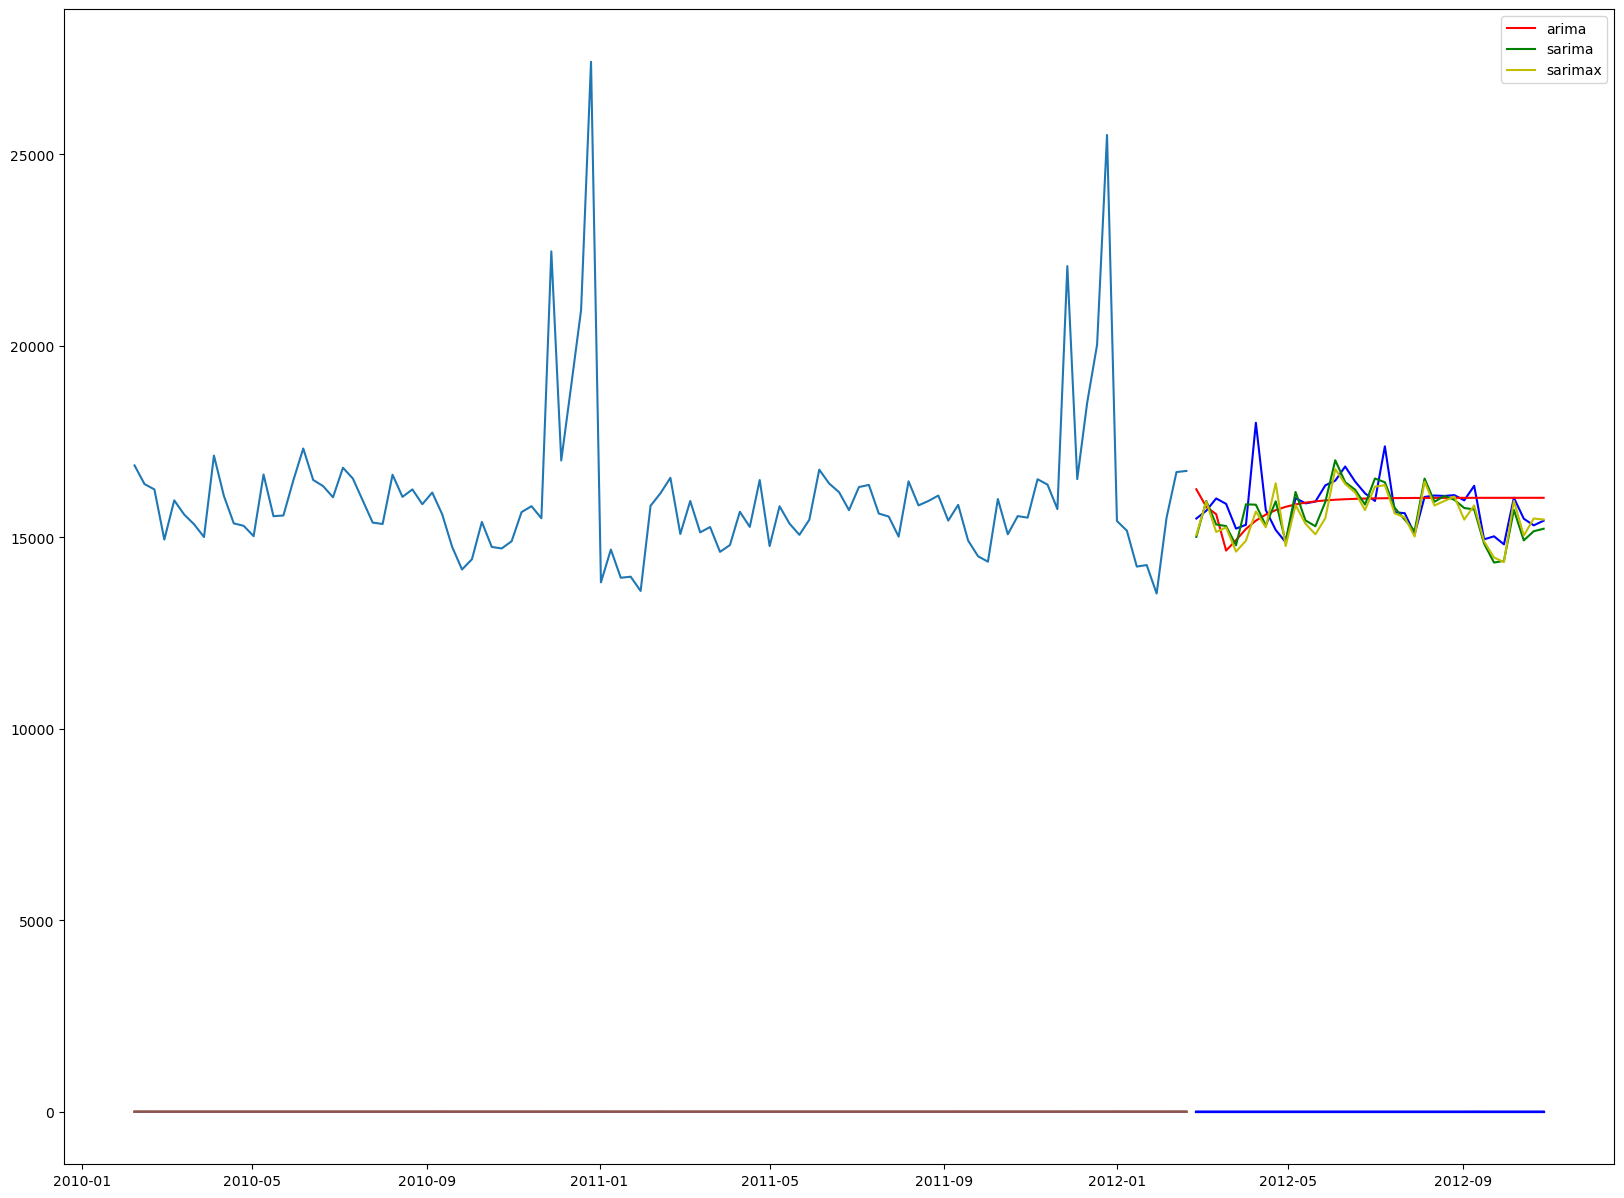

In [170]:
plt.figure(figsize=(20,15))
plt.plot(train)
plt.plot(test,color ='b');
plt.plot(y_arima,color = 'r',label = 'arima')
plt.plot(y_sarima_2,color = 'g',label = 'sarima')
plt.plot(y_sarimax_1,color = 'y',label = 'sarimax')
plt.legend()
plt.show()